# FAF.FIA16.1 -- Artificial Intelligence Fundamentals

> **Lab 3:** Linear Regression \\
> **Performed by:** Pasecinic Nichita, group FAF-192 \\
> **Verified by:** Mihail Gavrilita, asist. univ.





## `pip` installs

In [2]:
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install pandas


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Imports

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import csv

## 1. Clean-up & normalize the dataset

In [5]:

def to_int_or_float(string):
    try:
        number = float(string)
        if number.is_integer():
            return int(number)
        return number
    except ValueError:
        return None


def normalize():
    lines = open('apartmentComplexData.txt').read().splitlines()
    with open('normalized.csv', 'w', newline='') as file:
        writer = csv.writer(file)

        for line in lines:
            split = line.split(',')
            writer.writerow([to_int_or_float(split[2]), to_int_or_float(split[3]), to_int_or_float(split[4]),
                             to_int_or_float(split[5]), to_int_or_float(split[6]), to_int_or_float(split[8])])


In [6]:
normalize()

## 2. Inspect on initial data set on `pairplot`

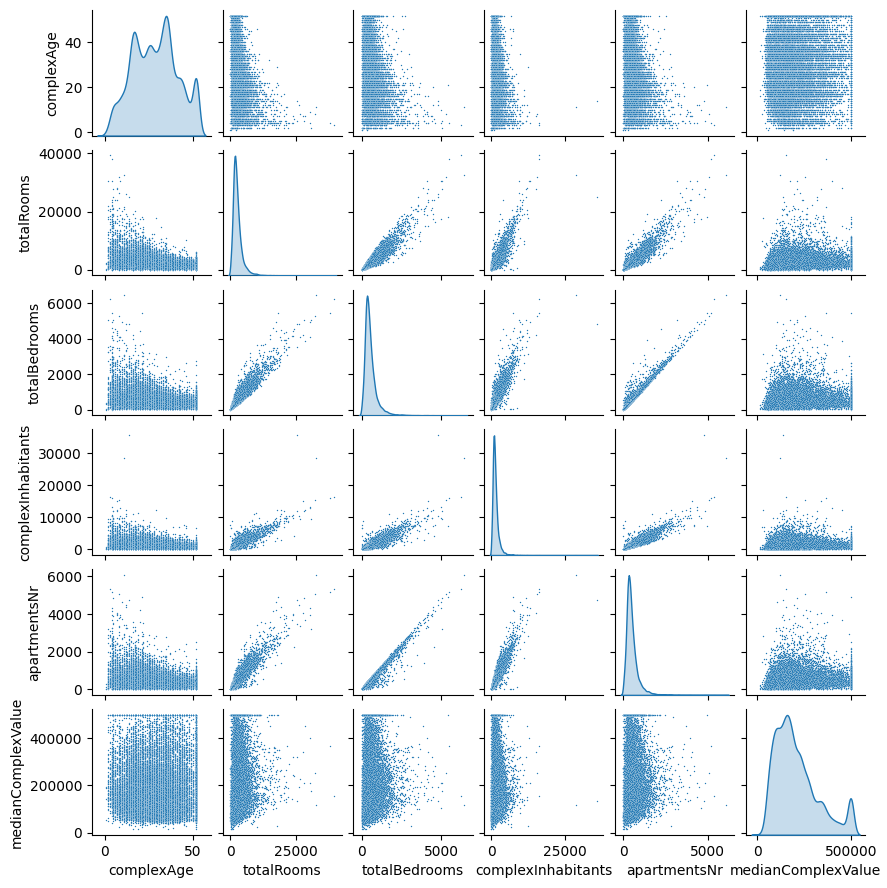

In [8]:
column_names = ['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr', 'medianComplexValue']
raw_dataset = pd.read_csv("normalized.csv", names=column_names)

x = raw_dataset[['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr', ]].values
y = raw_dataset['medianComplexValue'].values
sns.pairplot(raw_dataset[column_names], diag_kind='kde', height=1.5, plot_kws=dict(s=1))
plt.show()

## 3. Get train & test datasets

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# 25% - test train
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(x_train)

[[  32 9534 1819 4951 1710]
 [  52 2217  394  907  369]
 [   6 1755  280  664  254]
 ...
 [  42 1433  295  775  293]
 [  10 2381  454 1323  477]
 [  35 1802  459 1009  390]]


## 4. Sk models

In [15]:
def get_prediction(model, x_test, y_test, name):
    prediction = model.predict(x_test)

    print(name, 'x coefficients: ', model.coef_)
    print(name, 'coefficient of determination: %.2f' % r2_score(y_test, prediction), '\n')
    return prediction

# 4 different models
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = get_prediction(lr_model, x_test, y_test, 'LinearRegression')

en_model = linear_model.ElasticNet(random_state=1)
en_model.fit(x_train, y_train)
en_pred = get_prediction(en_model, x_test, y_test, 'ElasticNet')

ls_model = linear_model.Lasso(random_state=1)
ls_model.fit(x_train, y_train)
ls_pred = get_prediction(ls_model, x_test, y_test, 'Lasso')

rd_model = linear_model.Ridge(random_state=1)
rd_model.fit(x_train, y_train)
rd_pred = get_prediction(rd_model, x_test, y_test, 'Ridge')

LinearRegression x coefficients:  [1599.19560942   45.42813182 -289.10781269  -63.14434603  278.5182114 ]
LinearRegression coefficient of determination: 0.17 

ElasticNet x coefficients:  [1593.37317602   45.41072586 -289.10193898  -63.14678895  278.55037061]
ElasticNet coefficient of determination: 0.17 

Lasso x coefficients:  [1599.18842623   45.42810246 -289.10751859  -63.14432699  278.51791824]
Lasso coefficient of determination: 0.17 

Ridge x coefficients:  [1599.19485488   45.42812956 -289.10781197  -63.14434635  278.51821562]
Ridge coefficient of determination: 0.17 



## 5. Plot models predictions for test dataset comparative to real values

(0.0, 500000.0)

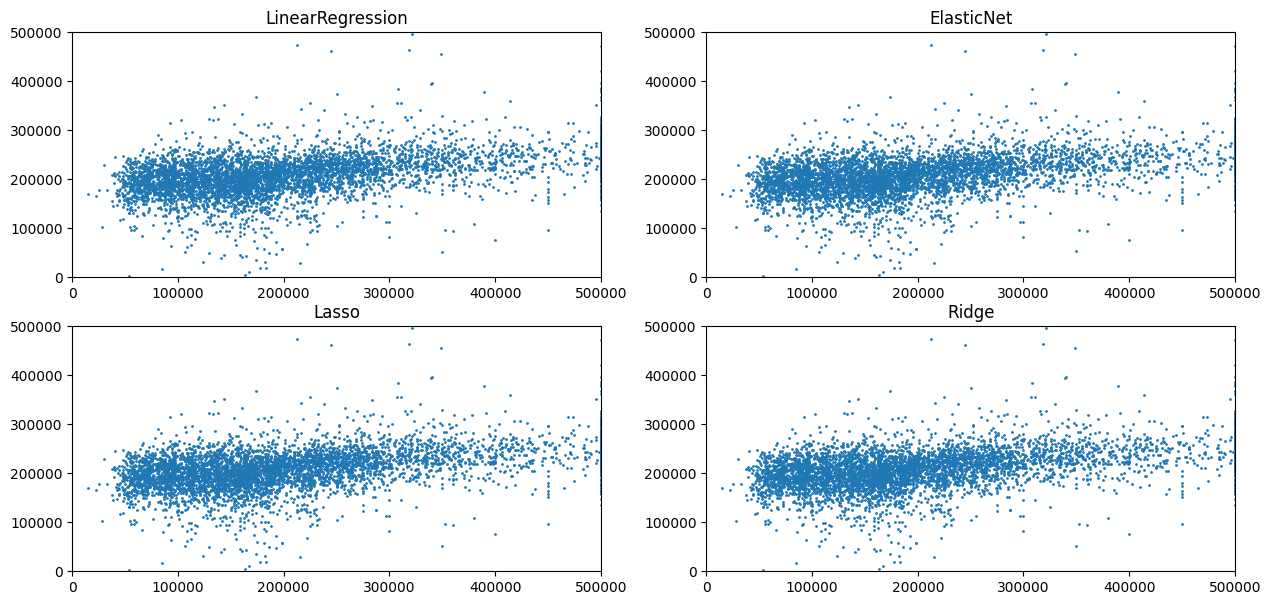

In [18]:

# Plot
figure, axis = plt.subplots(2, 2)
figure.set_figwidth(15)
figure.set_figheight(7)
lims = [0, 500000]

axis[0, 0].scatter(y_test, lr_pred, s=1)
axis[0, 0].set_title("LinearRegression")
axis[0, 0].set_xlim(lims)
axis[0, 0].set_ylim(lims)

axis[0, 1].scatter(y_test, en_pred, s=1)
axis[0, 1].set_title("ElasticNet")
axis[0, 1].set_xlim(lims)
axis[0, 1].set_ylim(lims)

axis[1, 0].scatter(y_test, ls_pred, s=1)
axis[1, 0].set_title("Lasso")
axis[1, 0].set_xlim(lims)
axis[1, 0].set_ylim(lims)

axis[1, 1].scatter(y_test, rd_pred, s=1)
axis[1, 1].set_title("Ridge")
axis[1, 1].set_xlim(lims)
axis[1, 1].set_ylim(lims)

## Conclusions:

Statistics is int

## Bibliography:

- https://realpython.com/linear-regression-in-python/